<a href="https://colab.research.google.com/github/sarabjeet050/Machine-Learning-Project/blob/main/Project_1_Mercedes_Benz_Greener_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# train and test datasets urls
train_url = "https://raw.githubusercontent.com/sarabjeet050/Machine-Learning-Project/main/train.csv"
test_url = "https://raw.githubusercontent.com/sarabjeet050/Machine-Learning-Project/main/test.csv"

In [3]:
# Load the train and test data from the urls 
train_df = pd.read_csv(train_url)
test_df  = pd.read_csv(test_url)

In [4]:
# Print the shape of train and test datasets
print("Size of train dataset: {} rows and {} columns".format(*train_df.shape) )
print("Size of test dataset: {} rows and {} columns".format(*test_df.shape) )

Size of train dataset: 4209 rows and 378 columns
Size of test dataset: 4209 rows and 377 columns


In [5]:
# Show first 5 rows of train dataset
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Show first 5 rows of test dataset
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# Columns of train dataset
train_df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [8]:
# Columns of test dataset
test_df.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [9]:
# Getting the different datatypes and their counts in train dataset
train_df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [10]:
# Check for zero variance columns and remove those variables from both train and test datasets
train_df_numerical = train_df.select_dtypes(exclude=np.object) #variance calculated for numeric datatype only
train_df_numerical = train_df_numerical.drop(columns=["ID","y"]) # excluding ID , y output columns for zero variance check. 
# train_df_numerical
zero_variance_cols = train_df_numerical.columns[train_df_numerical.var() == 0]
print("Zero variance columns : ", zero_variance_cols, " Count: ", zero_variance_cols.size)
train_df.drop(zero_variance_cols, axis = 1, inplace = True) 
test_df.drop(zero_variance_cols, axis = 1, inplace = True)


Zero variance columns :  Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')  Count:  12


In [11]:
# Check for null values in the train and test datasets
print("Train data null values:\n", train_df.isnull().sum().sum())
print("\nTest data null values:\n", test_df.isnull().sum().sum())

# Check for unique values in the train and test datasets
print("\nTrain data unique values:\n", train_df.nunique())
print("\nTest data unique values:\n", test_df.nunique()) 


Train data null values:
 0

Test data null values:
 0

Train data unique values:
 ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

Test data unique values:
 ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 365, dtype: int64


###### Here no null values in train and test datasets, so no handling required. However, some categorical columns have a large number of unique values. We can handle that using dimensionality reduction techniques.

In [12]:
# Choosing feature, target variables for train dataset
train_df_feature = train_df.drop(columns = ["ID","y"])
train_df_target = train_df.y 
print(train_df_feature.shape)
print(train_df_target.shape)

(4209, 364)
(4209,)


In [13]:
# Choosing feature variable for test dataset
test_df_feature = test_df.drop(columns = ["ID"]) 
print(test_df_feature.shape)

(4209, 364)


In [14]:
# Apply label encoder to categorical variables for train and test dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print("Categorical Columns : ")
for col in train_df_feature.select_dtypes(include="object"):
    print(col)
    train_df_feature[col] = le.fit_transform(train_df_feature[col])
    test_df_feature[col] = le.fit_transform(test_df_feature[col])

Categorical Columns : 
X0
X1
X2
X3
X4
X5
X6
X8


In [15]:
print("Shape of features, target before dimensionality redution :  ")
print(train_df_feature.shape)
print(train_df_target.shape)

# Perform dimensionality reduction.
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

Shape of features, target before dimensionality redution :  
(4209, 364)
(4209,)


In [16]:
# pca for train dataset
pca.fit(train_df_feature)

PCA(n_components=0.95)

In [17]:
pca.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604])

In [18]:
pca.explained_variance_ratio_.sum()

0.9560793581067433

In [57]:
# tranformed features after dimensionality redution using PCA on train dataset
train_df_feature_trans = pca.transform(train_df_feature)
print("Shape of features after dimensionality redution of train features : ",train_df_feature_trans.shape)

Shape of features after dimensionality redution of train features :  (4209, 6)


In [52]:
# pca for test dataset
pca.fit(test_df_feature)

PCA(n_components=0.95)

In [56]:
pca.explained_variance_ratio_

array([0.4351543 , 0.17671029, 0.13646395, 0.10977994, 0.08622272,
       0.01433973])

In [55]:
pca.explained_variance_ratio_.sum()

0.9586709314660359

In [58]:
# tranformed features after dimensionality redution using PCA on test dataset
test_df_feature_trans = pca.transform(test_df_feature)
print("Shape of features after dimensionality redution of test features : ",test_df_feature_trans.shape)

Shape of features after dimensionality redution of test features :  (4209, 6)


#### Predict your test_df values using XGBoost

In [20]:
# Building the model using the train dataset
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error  

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_df_feature_trans, train_df_target, test_size = 0.3, random_state = 7)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2946, 6) (2946,)
(1263, 6) (1263,)


#### XGBoost's hyperparameters tuning manually

In [39]:
# from xgboost.core import Objective
xgb_reg = xgb.XGBRegressor(Objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.4, max_depth = 10, alpha = 6, n_estimators = 20)
model = xgb_reg.fit(X_train, y_train)

[21:03:30] WARNING: ../src/learner.cc:767: 
Parameters: { "Objective" } are not used.



In [40]:
# Predictions using model test sample.
preds = model.predict(X_test)

In [42]:
# print(accuracy_score(y_test,preds))
print('RMSE = ',np.sqrt(mean_squared_error(preds, y_test)))

RMSE =  12.146556892077495


###### After tuning the hyperparameters to meet the minimum RMSE, RMSE turned out as 12.15 

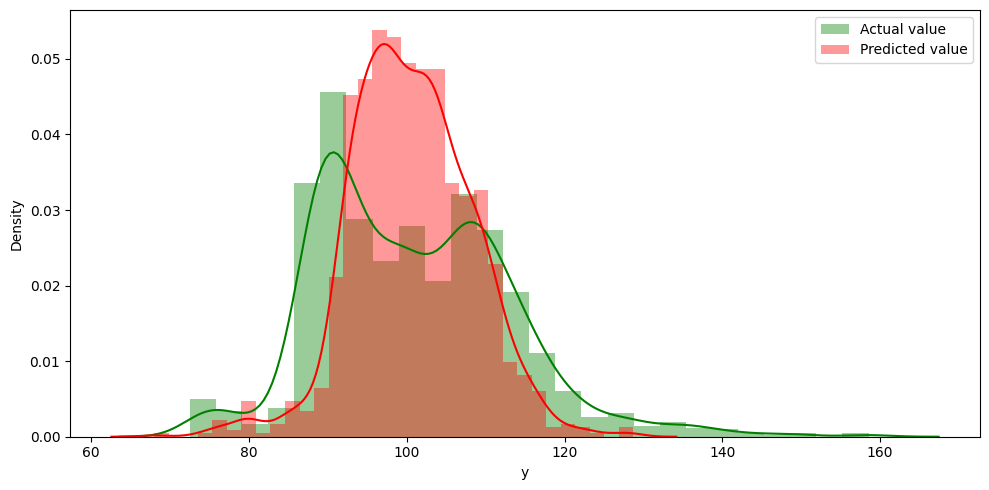

In [61]:
# Plotting the model actual and predicted values using distributions for comparision on test sample of train dataset
plt.figure(figsize=(10,5))

sns.distplot(y_test[y_test<160], color="green", label="Actual value")
sns.distplot(preds[preds<160] , color="red", label="Predicted value")
plt.legend()

plt.tight_layout()

###### k-fold Cross Validation using XGBoost

In [51]:
dmatrix_train = xgb.DMatrix(data = train_df_feature_trans, label = train_df_target)

params = {"Objective" : 'reg:linear', "colsample_bytree" : 0.5, "learning_rate" : 0.5, "max_depth" : 5, "alpha" : 10}

model_cv = xgb.cv(dtrain = dmatrix_train, params = params, nfold = 3, num_boost_round = 50, early_stopping_rounds = 10, metrics = "rmse", as_pandas = True, seed =7)

model_cv.tail(5)

[21:08:13] WARNING: ../src/learner.cc:767: 
Parameters: { "Objective" } are not used.

[21:08:13] WARNING: ../src/learner.cc:767: 
Parameters: { "Objective" } are not used.

[21:08:13] WARNING: ../src/learner.cc:767: 
Parameters: { "Objective" } are not used.



,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
15,8.229758,0.323906,10.547464,0.717295
16,8.150120,0.337937,10.547080,0.709449
17,8.041109,0.324012,10.541672,0.705840
18,7.887501,0.276083,10.507851,0.718480
19,7.769926,0.295642,10.502040,0.714540


###### However, using k-fold cross validation, RMSE comes as 10.55. So RMSE is reduced by ~13% 

#### Predictions on test dataset using XGBoost

In [60]:
test_preds = model.predict(test_df_feature_trans)
test_preds

array([ 85.39225,  95.29286,  96.12302, ...,  95.33495, 118.03861,
        96.75933], dtype=float32)

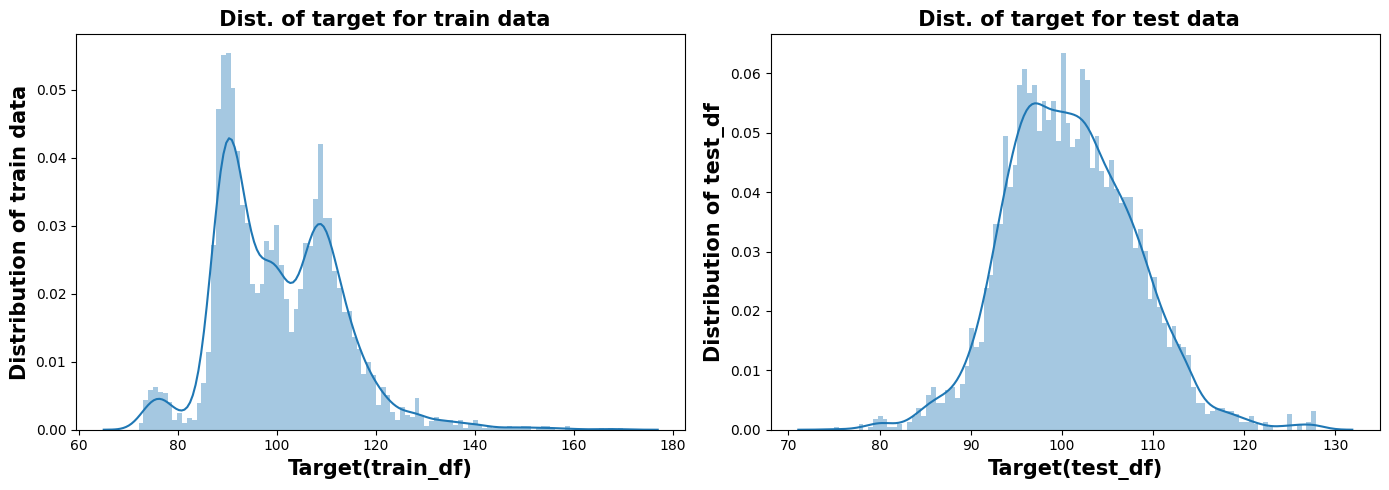

In [64]:
# Plotting the model distributions for comparision on train target and test target 

fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_df_target[train_df_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_df)', weight='bold', size=15)
train_plot.set_ylabel('Distribution of train data', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_preds[test_preds<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_df)', weight='bold', size=15)
test_plot.set_ylabel('Distribution of test_df', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()

###### This is a pictorial view for comparison between the target for training data-set and predicted target for testing data-set.

###### Also, from above ditribution the XGBoost model learned well for train dataset and resemble normalized distribution on test dataset.

###### Using this model, it will contribute to faster testing, resulting in optimal method to the test bench without reducing Mercedes-Benz’s standards.